In [1]:
%%capture
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading Dataset

In [3]:
def load_dataset(csv_file):
    return pd.read_csv(csv_file)

# Specify the path to the CSV file
csv_file = "googleplaystore.csv"

# Load the dataset using the load_dataset function
dataset = load_dataset(csv_file)

# Print the first few rows of the loaded DataFrame
print(dataset.head())



                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

# Dataset Summary


In [4]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    
    print("\nFirst 10 rows of dataset:")
    pd.set_option('display.max_columns', None)
    print(dataset.head(10))
    pd.reset_option('display.max_columns')
    
    print("\nStatistical summary:")
    print(dataset.describe())

# Specify the path to the CSV file
csv_file = "googleplaystore.csv"

# Load the dataset using the load_dataset function
dataset = load_dataset(csv_file)

# Print summarized dataset information
print_summarize_dataset(dataset)


Dataset dimension:
(10841, 13)

First 10 rows of dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0 

# Data Cleaning

In [5]:
def clean_dataset(dataset):
    # Remove duplicate rows
    dataset.drop_duplicates(inplace=True)
    
    # Remove rows with missing values
    dataset.dropna(inplace=True)
    
    # Remove "+" and "," from "Installs" column and convert to integer
    dataset['Installs'] = dataset['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
    
    # Remove "$" from "Price" column and convert to float
    dataset['Price'] = dataset['Price'].str.replace('$', '').astype(float)
    
    # Convert "Reviews" column to integer
    dataset['Reviews'] = dataset['Reviews'].astype(int)
    
    return dataset

# Specify the path to the CSV file
csv_file_path = "googleplaystore.csv"

# Load the dataset using the load_dataset function
dataset = load_dataset(csv_file_path)

# Clean the dataset using the clean_dataset function
cleaned_dataset = clean_dataset(dataset)

# Print the first few rows of the cleaned dataset
print(cleaned_dataset.head())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159   19M     10000  Free    0.0       Everyone   
1      967   14M    500000  Free    0.0       Everyone   
2    87510  8.7M   5000000  Free    0.0       Everyone   
3   215644   25M  50000000  Free    0.0           Teen   
4      967  2.8M    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  

# Data Exploration

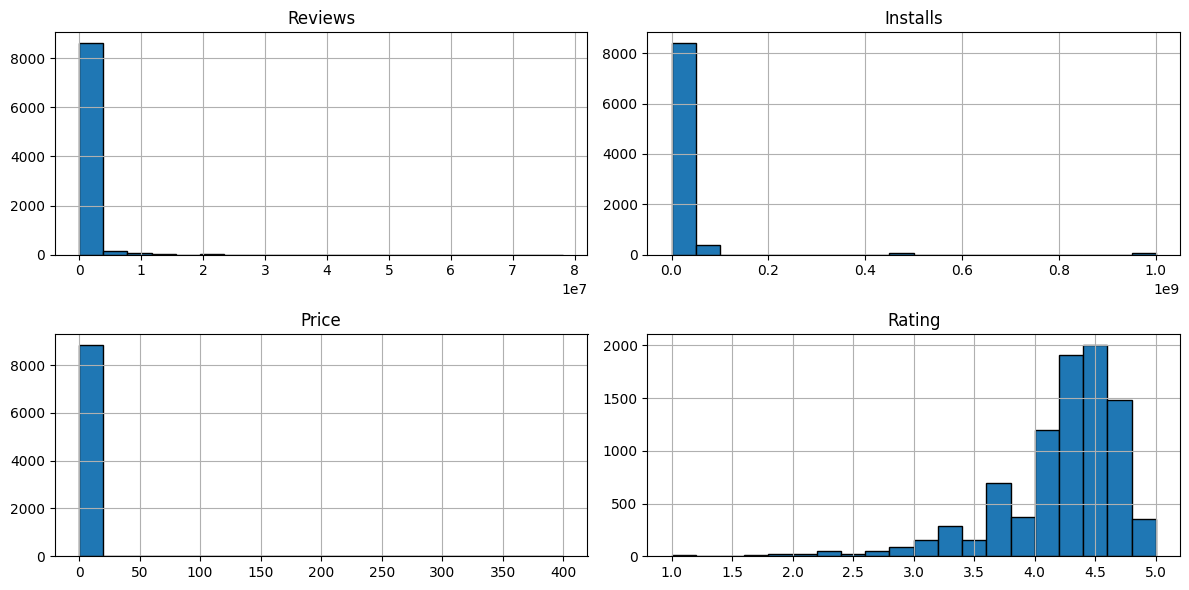

In [6]:
def print_histograms(dataset, histogram_columns):
    dataset[histogram_columns].hist(figsize=(12, 6), bins=20, edgecolor='black')
    plt.tight_layout()
    plt.show()

# Specify the path to the CSV file
csv_file_path = "googleplaystore.csv"

# Load and clean the dataset using the load_dataset and clean_dataset functions
dataset = load_dataset(csv_file_path)
cleaned_dataset = clean_dataset(dataset)

# Specify the column names for which you want to create histograms
histogram_columns = ['Reviews', 'Installs', 'Price', 'Rating']

# Print the histograms
print_histograms(cleaned_dataset, histogram_columns)


C:\Users\Great Woman\Downloads\New folder\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


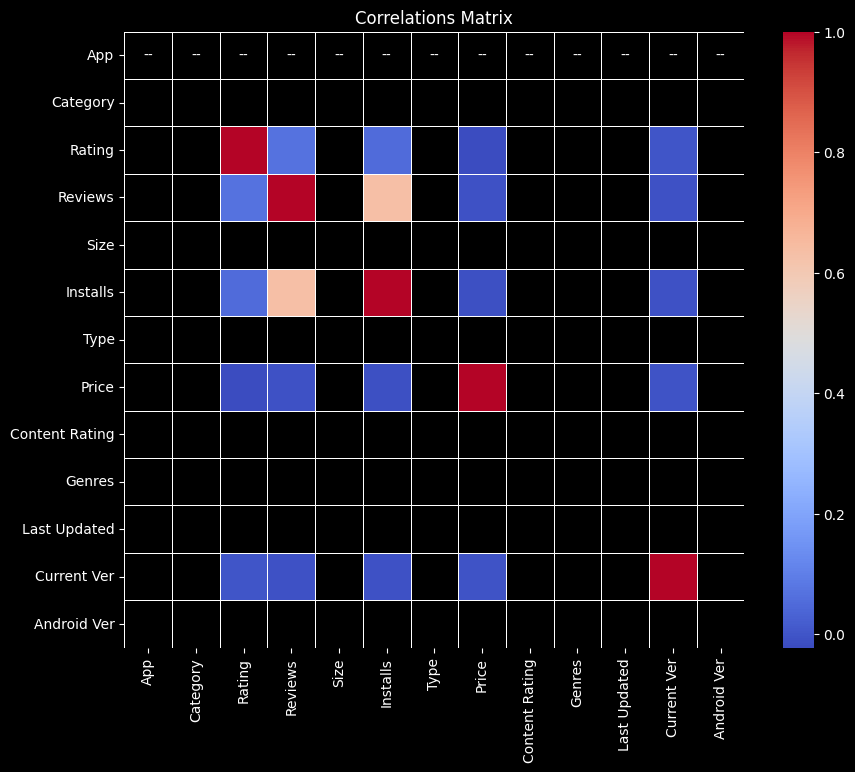

Correlations Matrix:
                App  Category    Rating   Reviews  Size  Installs  Type  \
App             NaN       NaN       NaN       NaN   NaN       NaN   NaN   
Category        NaN       NaN       NaN       NaN   NaN       NaN   NaN   
Rating          NaN       NaN  1.000000  0.068724   NaN  0.050869   NaN   
Reviews         NaN       NaN  0.068724  1.000000   NaN  0.633422   NaN   
Size            NaN       NaN       NaN       NaN   NaN       NaN   NaN   
Installs        NaN       NaN  0.050869  0.633422   NaN  1.000000   NaN   
Type            NaN       NaN       NaN       NaN   NaN       NaN   NaN   
Price           NaN       NaN -0.022371 -0.009562   NaN -0.011334   NaN   
Content Rating  NaN       NaN       NaN       NaN   NaN       NaN   NaN   
Genres          NaN       NaN       NaN       NaN   NaN       NaN   NaN   
Last Updated    NaN       NaN       NaN       NaN   NaN       NaN   NaN   
Current Ver     NaN       NaN -0.001894 -0.007359   NaN -0.007699   NaN   
Andr

In [22]:
# Load and clean the dataset using the load_dataset and clean_dataset functions
dataset = load_dataset(csv_file_path)
cleaned_dataset = clean_dataset(dataset)

# Use the compute_correlations_matrix function
correlations_matrix = compute_correlations_matrix(cleaned_dataset)

# Print the correlations matrix
print("Correlations Matrix:")
print(correlations_matrix)





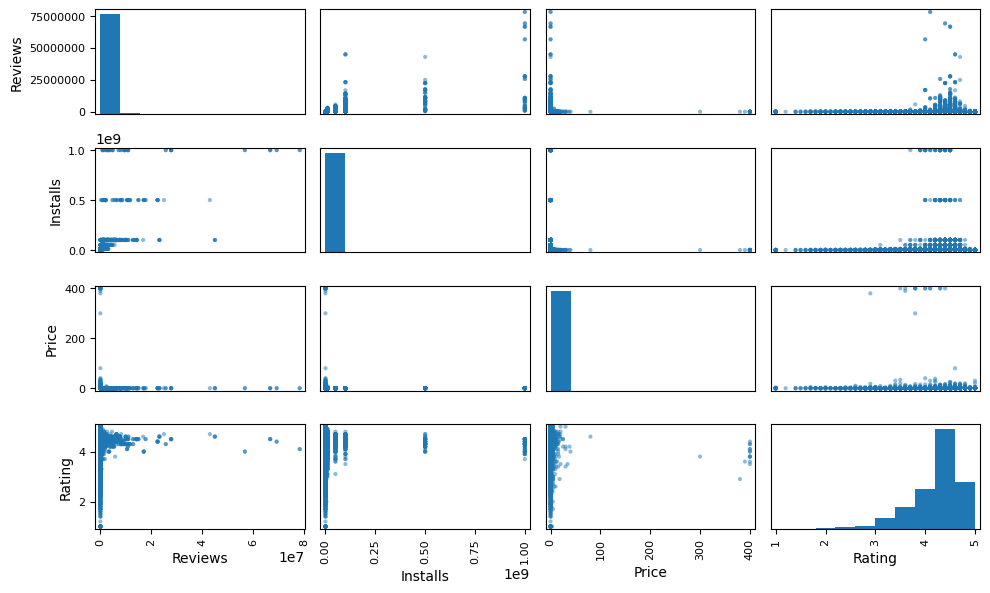

In [8]:
def print_scatter_matrix(dataset, scatter_columns):
    pd.plotting.scatter_matrix(dataset[scatter_columns], figsize=(10, 6), alpha=0.5)
    plt.tight_layout()
    plt.show()

# Specify the path to the CSV file
csv_file_path = "googleplaystore.csv"

# Load and clean the dataset using the load_dataset and clean_dataset functions
dataset = load_dataset(csv_file_path)
cleaned_dataset = clean_dataset(dataset)

# Specify the column names for which you want to create the scatter matrix
scatter_columns = ['Reviews', 'Installs', 'Price', 'Rating', 'Size']

# Print the scatter matrix
print_scatter_matrix(cleaned_dataset, scatter_columns)


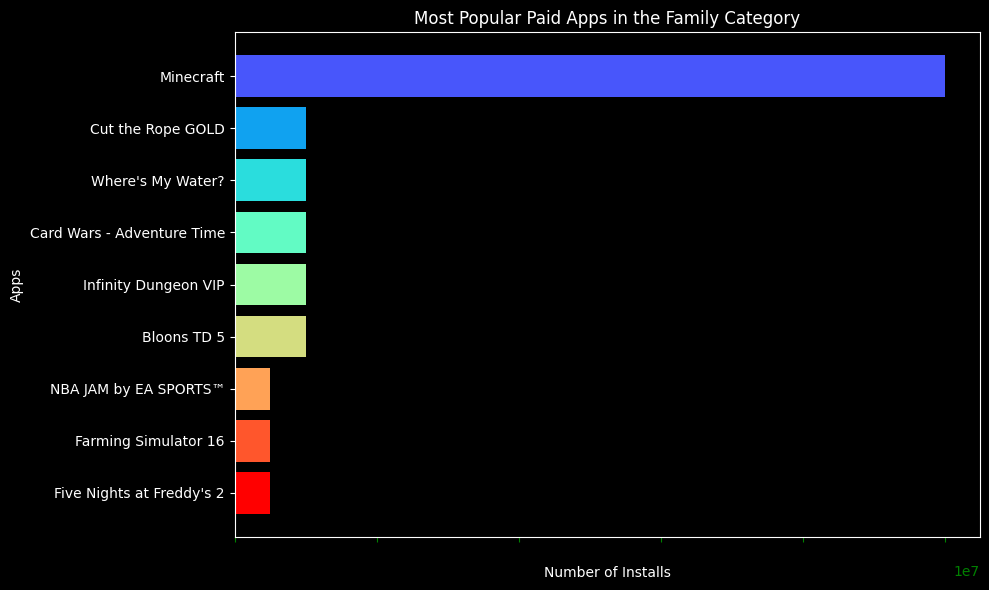

In [23]:
# Filter for "Family" category and paid apps
unique_filtered_apps = cleaned_dataset[(cleaned_dataset['Category'] == 'FAMILY') & (cleaned_dataset['Type'] == 'Paid')]

# Sort by number of installs in descending order
unique_sorted_apps = unique_filtered_apps.sort_values(by='Installs', ascending=False)

# Select top N apps
unique_top_apps_count = 10  # Change this value as needed
unique_top_apps = unique_sorted_apps.head(unique_top_apps_count)

# Create a horizontal bar plot with dark background and rainbow-colored bars
plt.figure(figsize=(10, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_top_apps)))  # Generate rainbow colors
plt.barh(unique_top_apps['App'], unique_top_apps['Installs'], color=colors)
plt.ylabel('Apps')
plt.xlabel('Number of Installs')
plt.title('Most Popular Paid Apps in the Family Category')
plt.gca().invert_yaxis()  # Invert y-axis for descending order

# Set a dark background
ax = plt.gca()
ax.set_facecolor('black')  # Dark background color

# Set text color to white for better visibility
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='white')
plt.xticks(color='black')

plt.tight_layout()

plt.show()


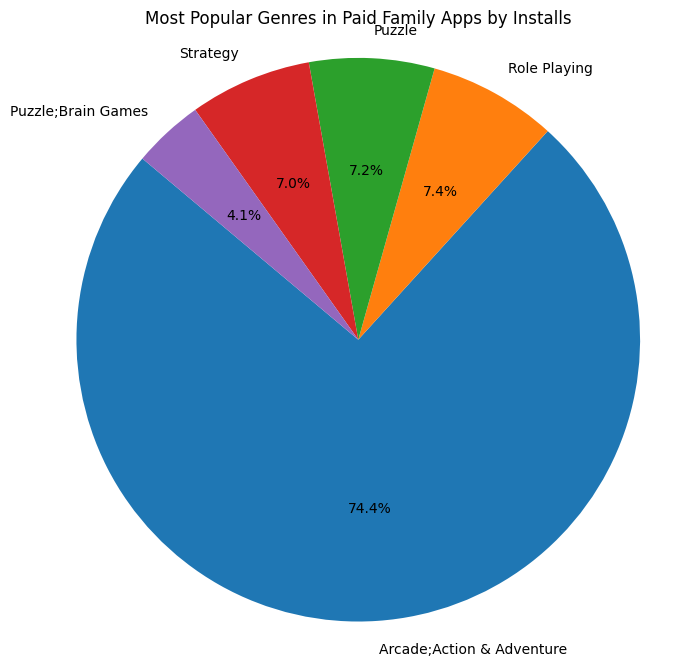

In [10]:
# Filter for "Family" category and paid apps
custom_filtered_apps = cleaned_dataset[(cleaned_dataset['Category'] == 'FAMILY') & (cleaned_dataset['Type'] == 'Paid')]

# Group by genre and sum the number of installs
custom_genre_installs = custom_filtered_apps.groupby('Genres')['Installs'].sum()

# Select top N genres
custom_top_genres_count = 5  # Change this value as needed
custom_top_genres = custom_genre_installs.sort_values(ascending=False).head(custom_top_genres_count)

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(custom_top_genres, labels=custom_top_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Popular Genres in Paid Family Apps by Installs')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


In [11]:
# Group by category and sum the number of installs
category_installs = cleaned_dataset.groupby('Category')['Installs'].sum()

# Convert the series to a NumPy array
category_installs_array = category_installs.to_numpy()

# Get the category names
category_names = category_installs.index

# Display the category names and their corresponding number of installations
for category, installs in zip(category_names, category_installs_array):
    print(f"Category: {category}, Installs: {installs}")


Category: ART_AND_DESIGN, Installs: 124228100
Category: AUTO_AND_VEHICLES, Installs: 53129800
Category: BEAUTY, Installs: 26916200
Category: BOOKS_AND_REFERENCE, Installs: 1916291655
Category: BUSINESS, Installs: 863518120
Category: COMICS, Installs: 56036100
Category: COMMUNICATION, Installs: 24152241530
Category: DATING, Installs: 206522410
Category: EDUCATION, Installs: 533852000
Category: ENTERTAINMENT, Installs: 2455660000
Category: EVENTS, Installs: 15949410
Category: FAMILY, Installs: 10041080590
Category: FINANCE, Installs: 770312400
Category: FOOD_AND_DRINK, Installs: 257777750
Category: GAME, Installs: 31543862717
Category: HEALTH_AND_FITNESS, Installs: 1361006220
Category: HOUSE_AND_HOME, Installs: 125082000
Category: LIBRARIES_AND_DEMO, Installs: 61083000
Category: LIFESTYLE, Installs: 534741120
Category: MAPS_AND_NAVIGATION, Installs: 724267560
Category: MEDICAL, Installs: 42162676
Category: NEWS_AND_MAGAZINES, Installs: 5393110650
Category: PARENTING, Installs: 31116110
C

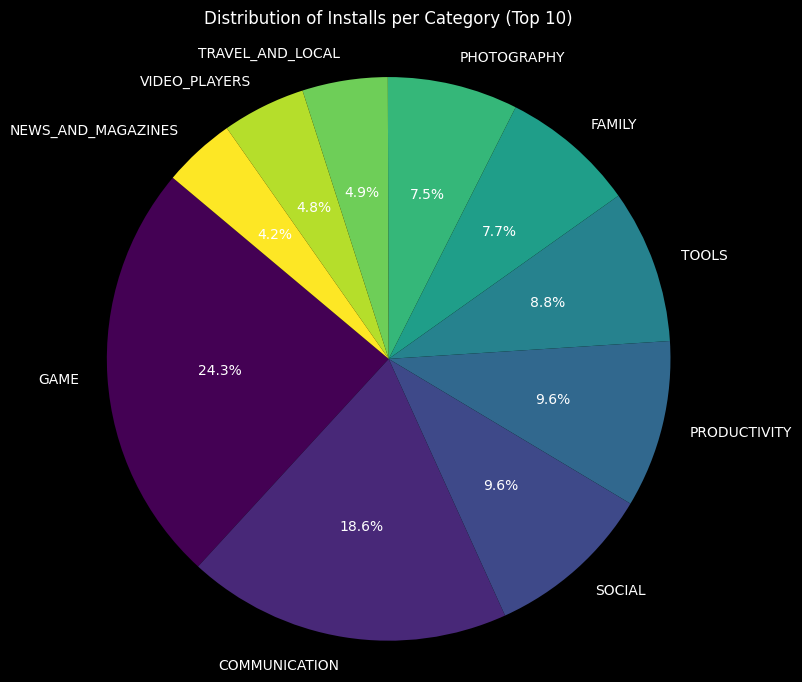

In [12]:
# Group by category and sum the number of installs
category_installs = cleaned_dataset.groupby('Category')['Installs'].sum()

# Select a subset of categories
subset_categories = category_installs.nlargest(10)  # Select the top N categories

# Set dark background style
plt.style.use('dark_background')

# Create a pie chart with 'viridis' colormap
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(subset_categories)))
ax.pie(subset_categories, labels=subset_categories.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Move the title below the pie chart
plt.title('Distribution of Installs per Category (Top 10)', pad=20)

plt.show()


C:\Users\Great Woman\AppData\Local\Temp\ipykernel_5028\4174301675.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('rainbow')


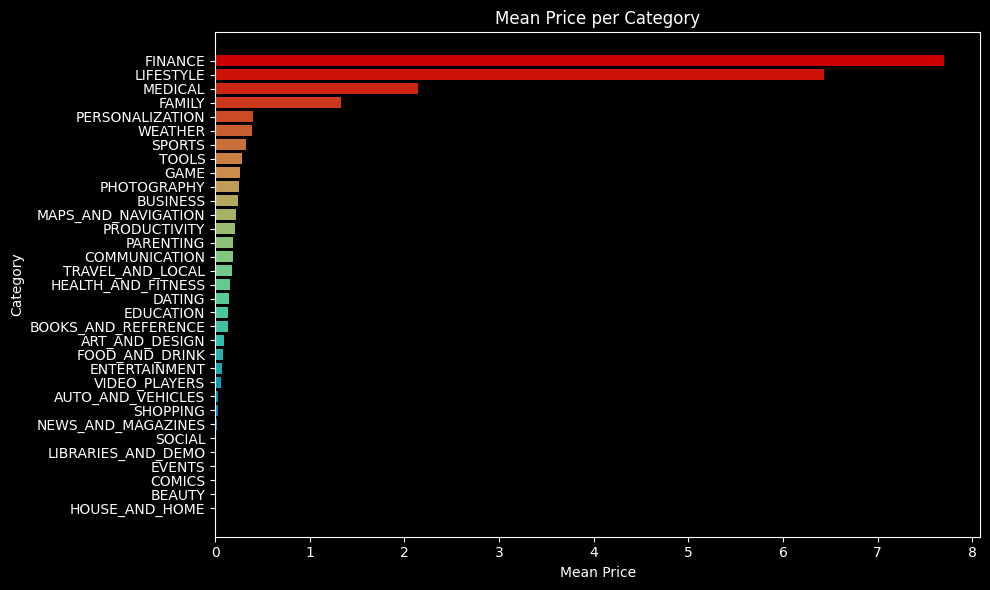

In [13]:
# Group by category and calculate the mean price
category_mean_price = cleaned_dataset.groupby('Category')['Price'].mean()

# Sorting the data in descending order
category_mean_price_sorted = category_mean_price.sort_values(ascending=False)

cmap = plt.cm.get_cmap('rainbow')

plt.style.use('dark_background')  # Set dark background

plt.figure(figsize=(10, 6))
bars = plt.barh(category_mean_price_sorted.index[::-1], category_mean_price_sorted.values[::-1], color=cmap(np.linspace(0, 1, len(category_mean_price_sorted))))

plt.ylabel('Category')
plt.xlabel('Mean Price')
plt.title('Mean Price per Category')
plt.tight_layout()

for bar in bars:
    bar.set_alpha(0.8)

plt.show()


C:\Users\Great Woman\AppData\Local\Temp\ipykernel_5028\2530438178.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('rainbow')


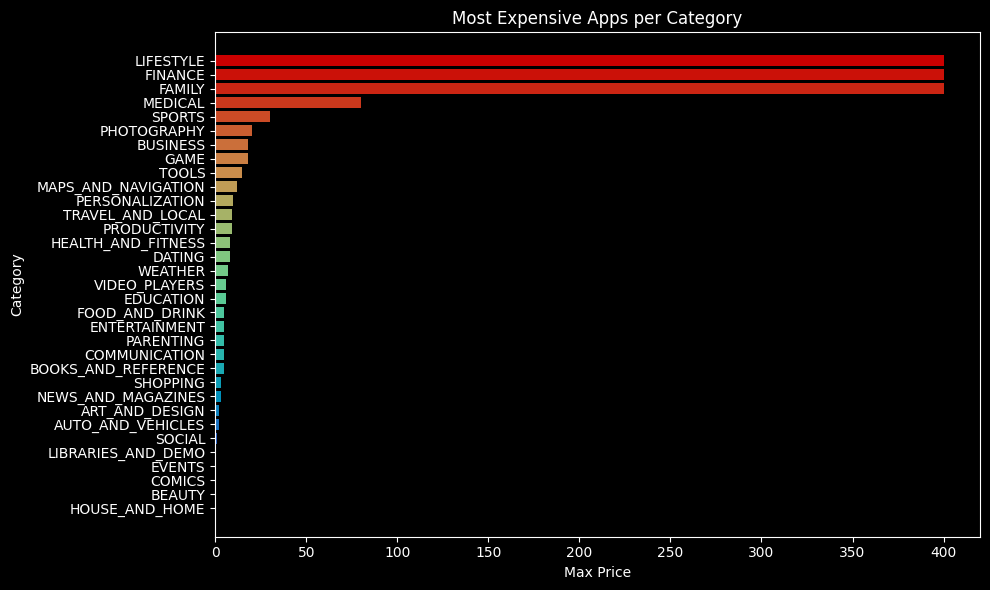

In [14]:
# Group by category and calculate the maximum price
category_max_price = cleaned_dataset.groupby('Category')['Price'].max()

# Sorting the data in descending order
category_max_price_sorted = category_max_price.sort_values(ascending=False)

cmap = plt.cm.get_cmap('rainbow')

plt.style.use('dark_background')  # Set dark background

plt.figure(figsize=(10, 6))
bars = plt.barh(category_max_price_sorted.index[::-1], category_max_price_sorted.values[::-1], color=cmap(np.linspace(0, 1, len(category_max_price_sorted))))

plt.ylabel('Category')
plt.xlabel('Max Price')
plt.title('Most Expensive Apps per Category')
plt.tight_layout()

for bar in bars:
    bar.set_alpha(0.8)

plt.show()
